<a href="https://colab.research.google.com/github/JothikrishnaT/ML-Project/blob/master/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Step 1**:  Import the datasets and libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as p
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data2.csv to Data2.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Data2.csv']),)

In [ ]:
df2.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df2.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


This are the things / features that are going to be checked for the probability that the person will **purchase loan**:



*   ID: Customer ID
*   Age: Customer's age in completed years
*   Experience: #years of professional experience
*   Income: Annual income of the customer ($000)
*   ZIP Code: Home Address ZIP code.
*   Family: Family size of the customer

*   CCAvg: Avg. spending on credit cards per month ($000)

*   Education: Education Level. 1: Undergrad; 2: Graduate; 3:
*   Advanced/Professional
*   Mortgage: Value of house mortgage if any. ($000)
*   Personal Loan: Did this customer accept the personal loan offered in the   lastcampaign?
*   Securities Account: Does the customer have a securities account with the bank?
*  CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?
*  Online: Does the customer use internet banking facilities? 
*  Credit card: Does the customer use a credit card issued by the bank?







In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df2.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df2.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### **Step 2** Removing unwanted data 

In [ ]:
exp=df2['Experience']
age=df2['Age']
correlation=exp.corr(age)
correlation

0.9942148569683321

In [ ]:
df2=df2.drop(['Age','Experience',"ZIP Code"],axis=1)
df2.head()

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,49,4,1.6,1,0,0,1,0,0,0
1,34,3,1.5,1,0,0,1,0,0,0
2,11,1,1.0,1,0,0,0,0,0,0
3,100,1,2.7,2,0,0,0,0,0,0
4,45,4,1.0,2,0,0,0,0,0,1


###***Step 3:*** Exploratory data Analysis

In [ ]:
# Get a series object containing the count of unique elements
# in each column of dataframe
uniqueValues = df2.nunique()
print('Count of unique value sin each column :')
print(uniqueValues)

Count of unique value sin each column :
Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64


In [ ]:
df2['Mortgage'].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

the number of people with zero mortage is 3462

In [ ]:
df2['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

The number of people with zero  credit card spending per month is 3530

**Value counts of all categorical columns.**

In [ ]:
df2['Education'].value_counts()


1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
df2['Family'].value_counts()


1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
df2['CCAvg'].value_counts()



0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.20      1
9.30      1
3.67      1
5.33      1
Name: CCAvg, Length: 108, dtype: int64

In [ ]:
df2['Online'].value_counts()


1    2984
0    2016
Name: Online, dtype: int64

In [ ]:
df2['Personal Loan'].value_counts()


0    4520
1     480
Name: Personal Loan, dtype: int64

In [ ]:
df2['Securities Account'].value_counts()


0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
df2['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

***univariate analysis***

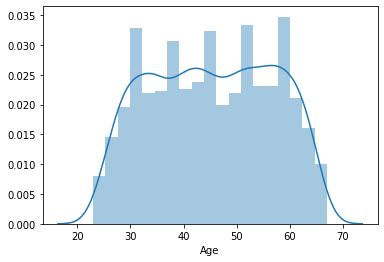

In [ ]:
sns.distplot(df2.Age);


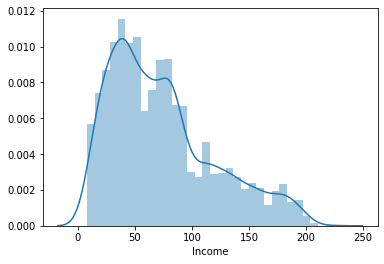

In [ ]:
sns.distplot(df2.Income);


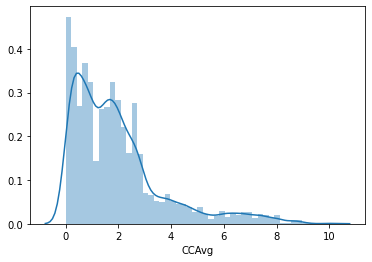

In [ ]:
sns.distplot(df2.CCAvg);


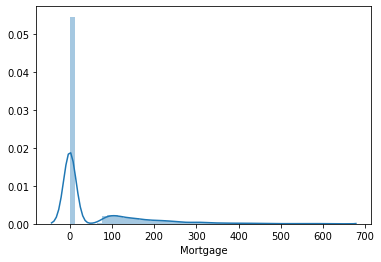

In [ ]:
sns.distplot(df2.Mortgage);


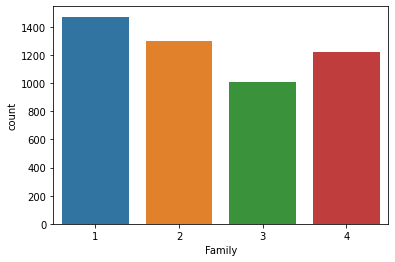

In [ ]:
sns.countplot(df2.Family);


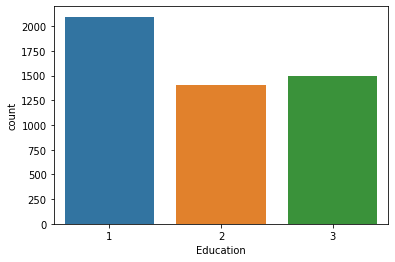

In [ ]:
sns.countplot(df2.Education);


***Multivariate analysis***

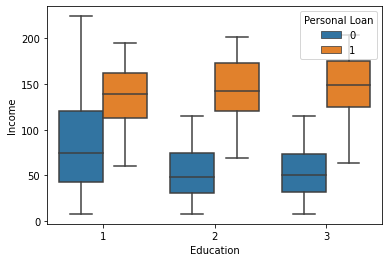

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df2);


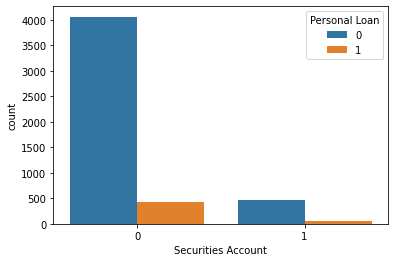

In [ ]:
sns.countplot(x='Securities Account',hue='Personal Loan',data=df2);

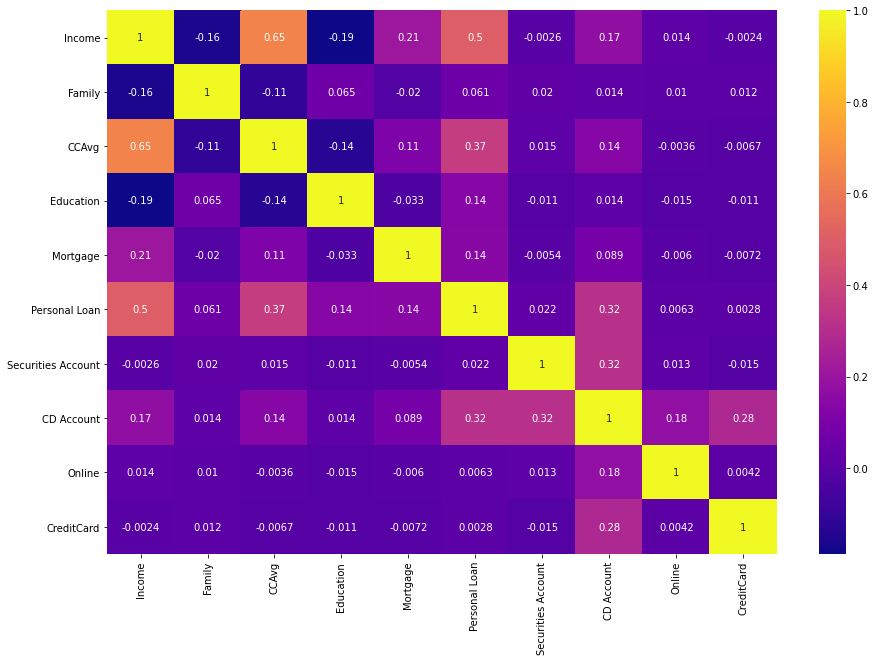

In [ ]:
fig, ax= p.subplots(figsize=(15,10))
sns.heatmap(df2.corr(), cmap='plasma',annot=True, )

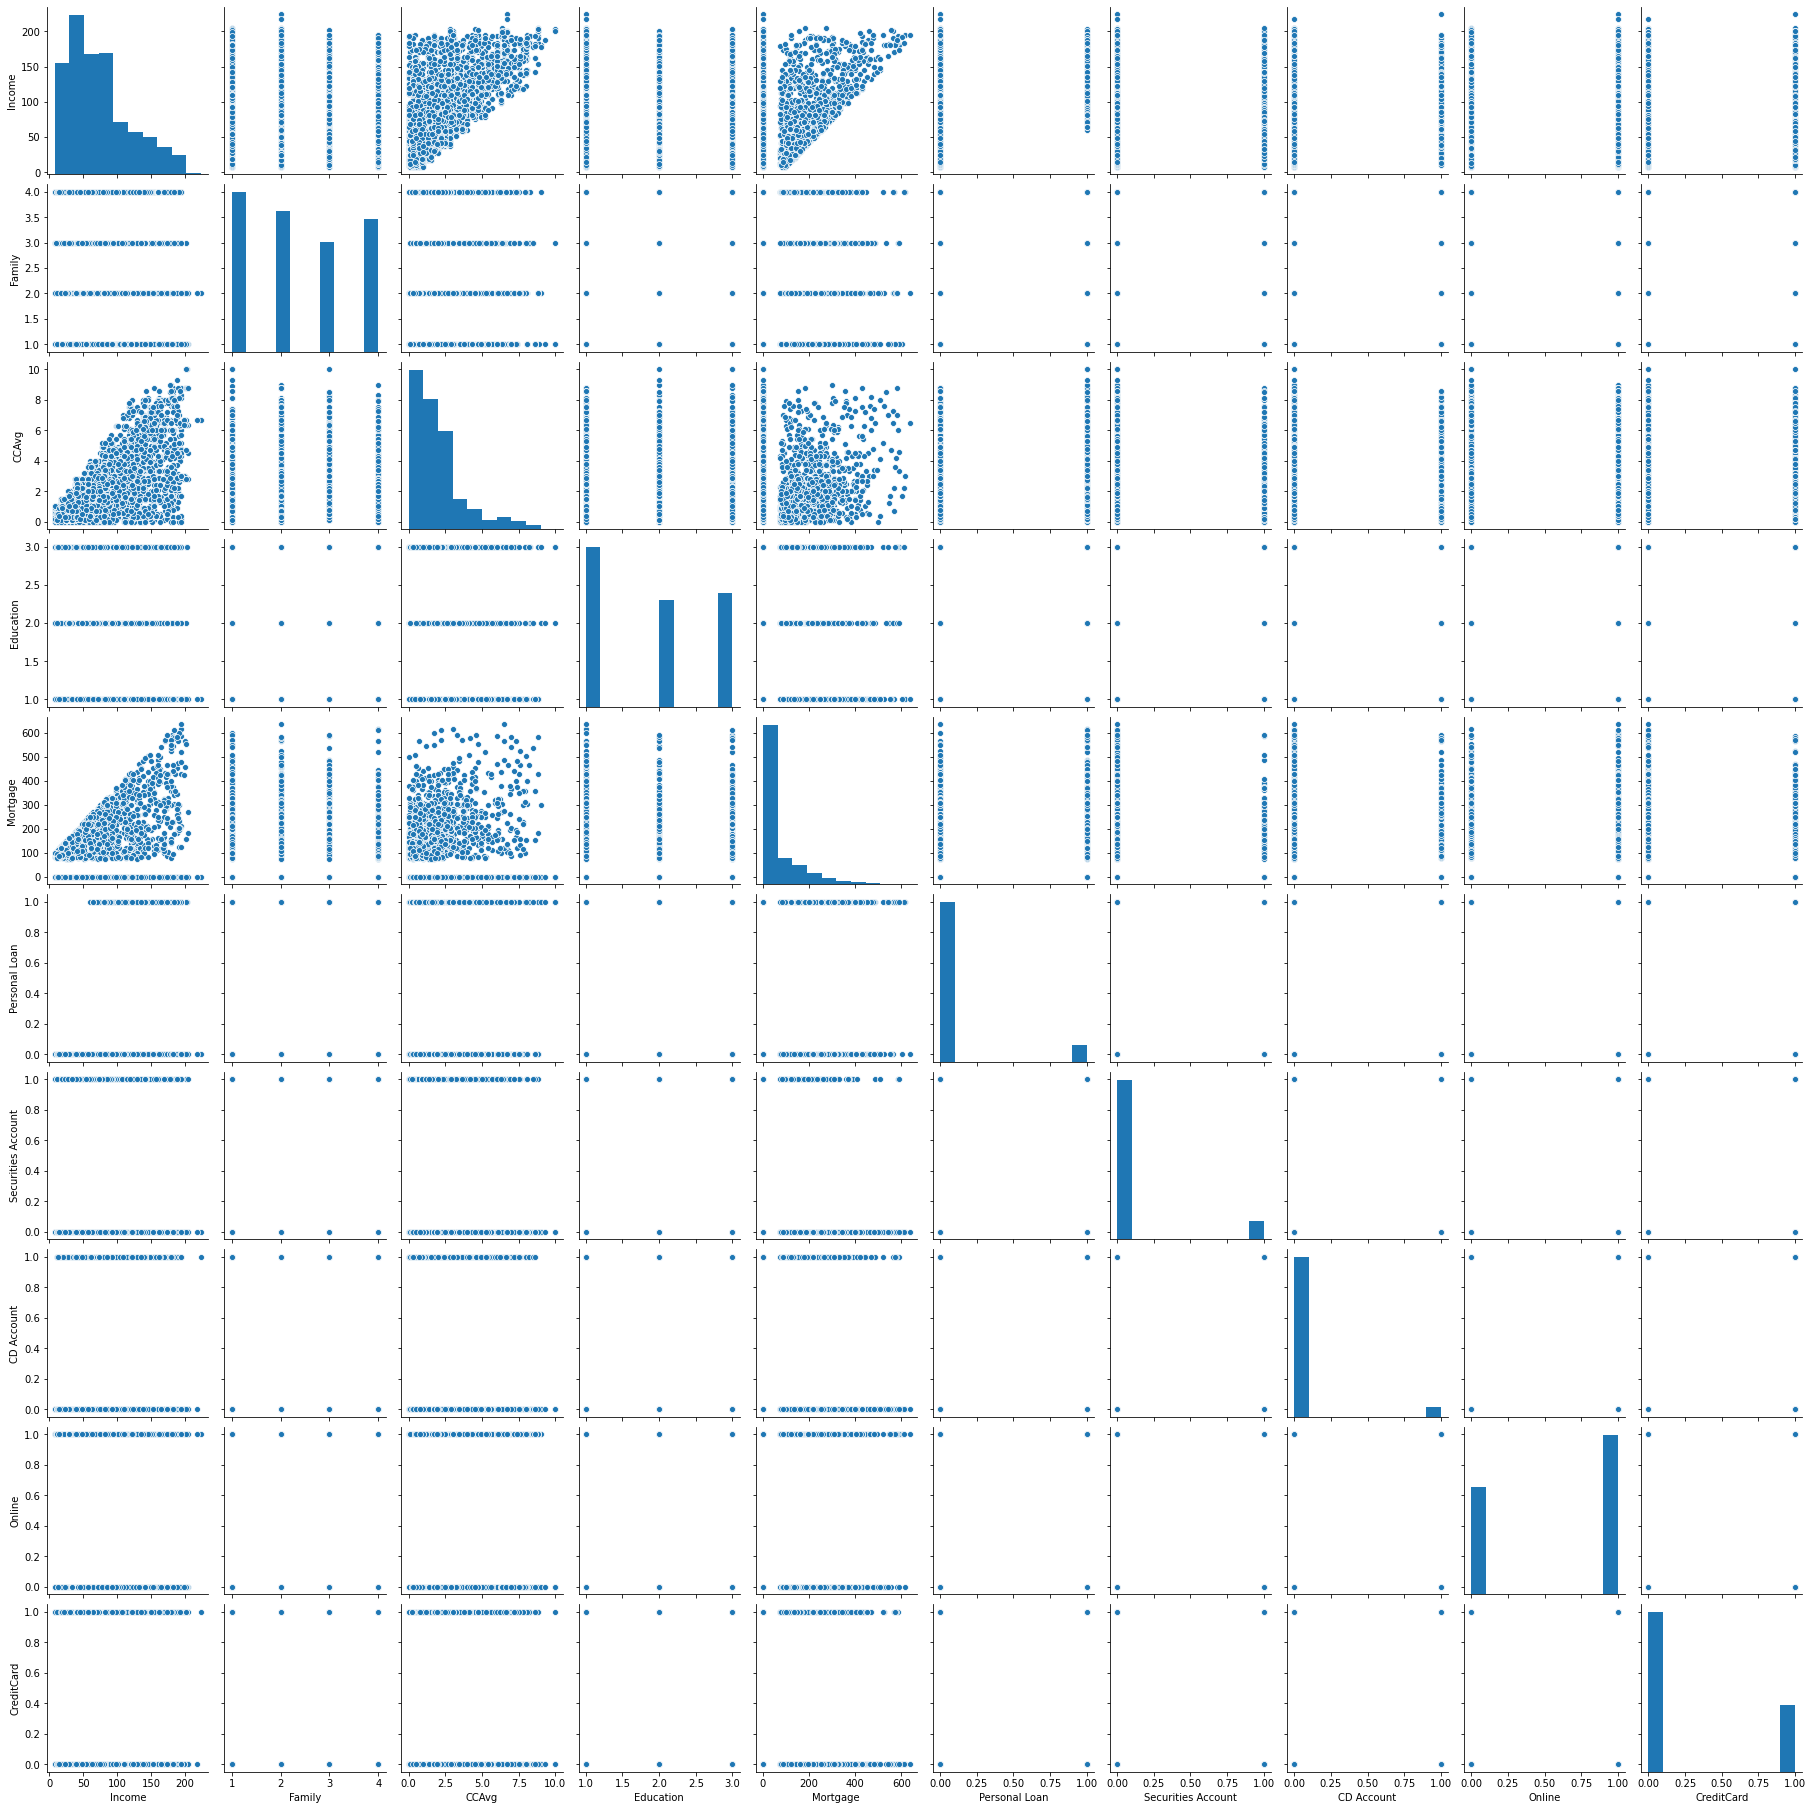

In [ ]:
sns.pairplot(df2)

**Step 4**: Transformation of feature variables 

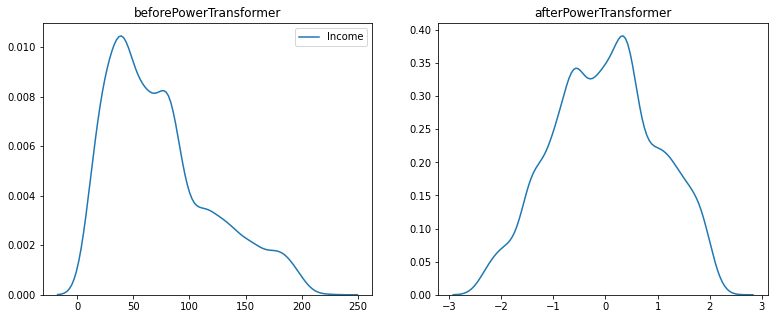

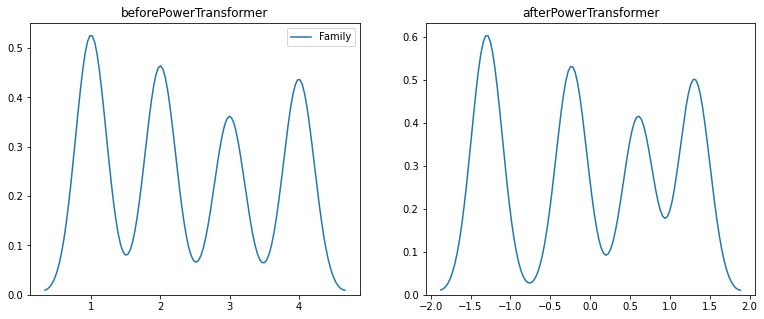

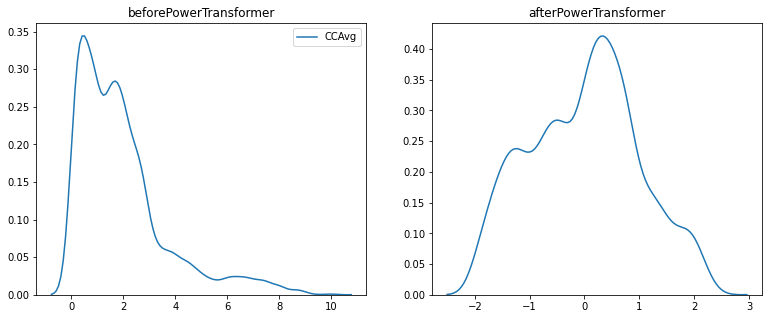

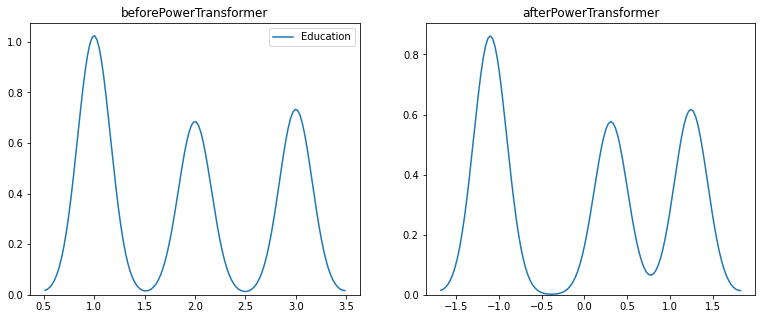

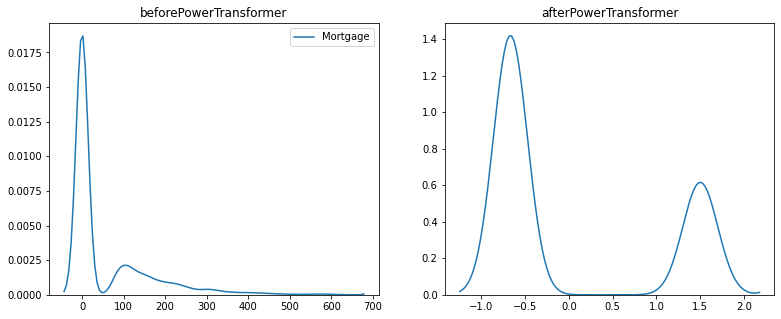

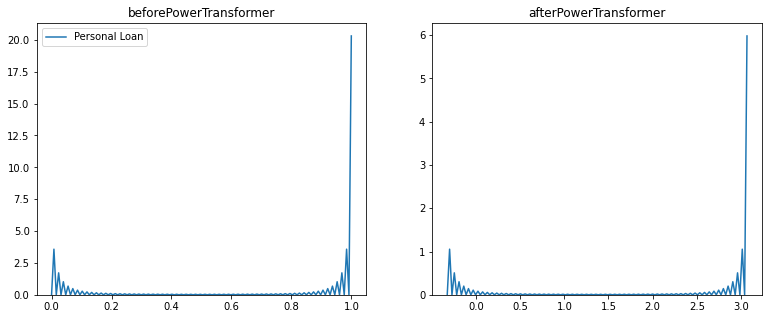

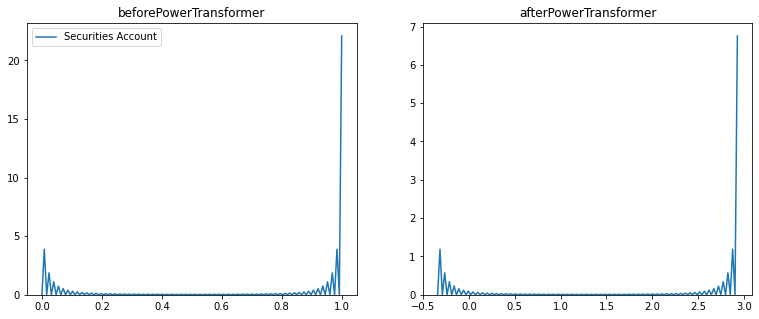

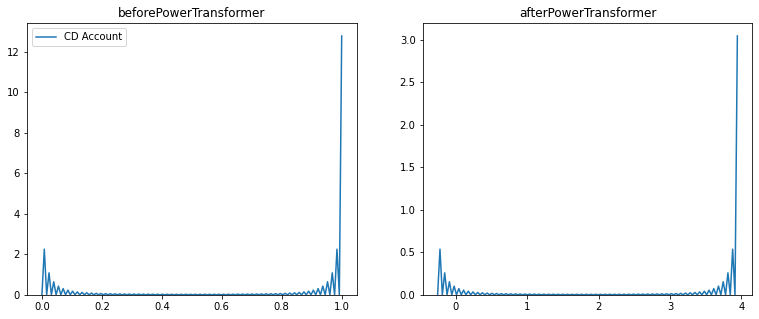

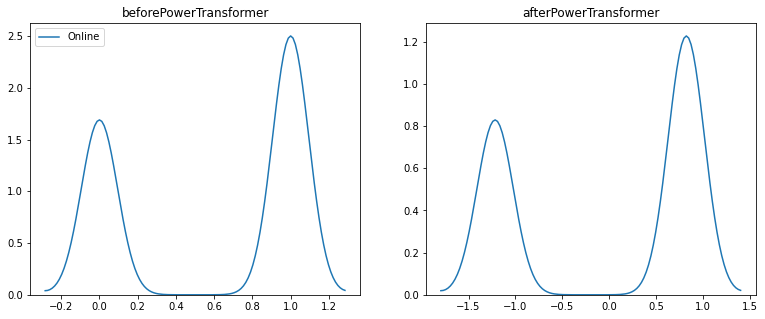

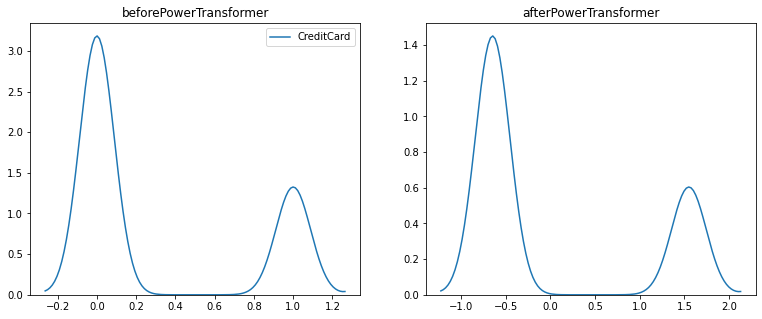

In [ ]:

from sklearn.preprocessing import PowerTransformer

def plots(df,var,t):
  p.figure(figsize=(13,5))
  p.subplot(121)
  sns.kdeplot(df[var])
  p.title('before'+str(t).split('(')[0])

  p.subplot(122)
  p1=t.fit_transform(df[[var]]).flatten()
  sns.kdeplot(p1)
  p.title('after'+str(t).split('(')[0])
for col in df2.columns :
  plots(df2,col,PowerTransformer())

In [ ]:
df1=df2.drop(['Personal Loan'],axis=1)

###**Step 5**: Splitting data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df1,df2['Personal Loan'], test_size=0.30, random_state=0, stratify = df2['Personal Loan'])
x_train.describe()
x=df1
y=df2['Personal Loan']


###**Step 6:** Applying logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x,y)
model.predict(x)
model.predict_proba(x)
model.score(x, y)


0.9084

In [ ]:
print(classification_report(y, model.predict(x)))


              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4520
           1       0.54      0.33      0.41       480

    accuracy                           0.91      5000
   macro avg       0.73      0.65      0.68      5000
weighted avg       0.89      0.91      0.90      5000



###**Step 7** Evaluvation of Model performance

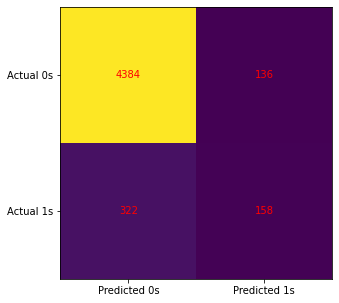

In [ ]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = p.subplots(figsize=(10,5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
p.show()

In [ ]:
import sklearn.metrics as metrics
a2=model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, a2))
print("Precision:",metrics.precision_score(y_test,a2))
print("Recall:",metrics.recall_score(y_test,a2))
print("F1 score:",metrics.f1_score(y_test,a2))
print("Roc auc score:",metrics.roc_auc_score(y_test,a2))

Accuracy: 0.9093333333333333
Precision: 0.5434782608695652
Recall: 0.3472222222222222
F1 score: 0.423728813559322
Roc auc score: 0.6581243854473944


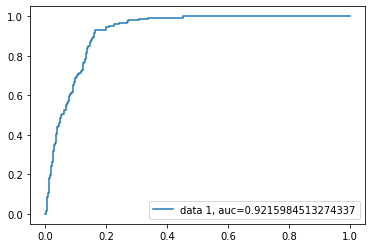

In [ ]:
a3 = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,a3)
auc = metrics.roc_auc_score(y_test,a3)
p.plot(fpr,tpr,label="data 1, auc="+str(auc))
p.legend(loc=4)
p.show()

###**Comparing using other models and their performance**

###  **Using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier(n_estimators=100)

rand.fit(x_train,y_train)

a3=rand.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, a3))
print("Precision:",metrics.precision_score(y_test,a3))
print("Recall:",metrics.recall_score(y_test,a3))
print("F1 score:",metrics.f1_score(y_test,a3))
print("Roc auc score:",metrics.roc_auc_score(y_test,a3))

Accuracy: 0.9886666666666667
Precision: 0.9774436090225563
Recall: 0.9027777777777778
F1 score: 0.9386281588447652
Roc auc score: 0.9502826941986233


###**Using KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
a4 = knn.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, a4))
print("Precision:",metrics.precision_score(y_test,a4))
print("Recall:",metrics.recall_score(y_test,a4))
print("F1 score:",metrics.f1_score(y_test,a4))
print("Roc auc score:",metrics.roc_auc_score(y_test,a4))

Accuracy: 0.8953333333333333
Precision: 0.3898305084745763
Recall: 0.1597222222222222
F1 score: 0.22660098522167488
Roc auc score: 0.5665867748279253


### **Conclusion**
From all the above data I conclude that random forest model is better than other models since the accuracy is 98 where as in case of logistic is 90 and KNN is 89.5. Hence from all the above Random Forest is preferable for performing the task 